### Logistic Regression - Supervised Learning - Classification

#### 1. Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data.csv')
df.head()

,-6,592,0
0,-5,807,0
1,-5,-344,0
2,-5,-126,0
3,-5,243,0
4,-5,185,0


In [3]:
df.shape

(199, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   -6      199 non-null    int64
 1   592     199 non-null    int64
 2   0       199 non-null    int64
dtypes: int64(3)
memory usage: 4.8 KB


In [5]:
df.dtypes

-6     int64
592    int64
0      int64
dtype: object

In [6]:
df.describe()

,-6,592,0
count,199.000000,199.000000,199.000000
mean,0.964824,325.477387,0.582915
std,3.636761,286.265167,0.494321
min,-5.000000,-445.000000,0.000000
25%,-2.000000,152.500000,0.000000
50%,1.000000,349.000000,1.000000
75%,4.000000,538.000000,1.000000
max,8.000000,1056.000000,1.000000


In [7]:
df.isnull().sum()

-6     0
592    0
0      0
dtype: int64

In [8]:
df[df.duplicated()]

,-6,592,0
40,-3,421,1
169,5,454,1


In [9]:
df.shape

(199, 3)

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(197, 3)

In [12]:
df.rename(columns={'-6':'Feature1','592':'Feature2','0':'Label'},inplace=True)

In [13]:
df.head()

,Feature1,Feature2,Label
0,-5,807,0
1,-5,-344,0
2,-5,-126,0
3,-5,243,0
4,-5,185,0


In [42]:
df.to_csv('updated_df.csv')

In [15]:
df.nunique()

Feature1     14
Feature2    180
Label         2
dtype: int64

##### Observations 💡
- 3 Columns available only
- No Null Values
- 2 Duplicate values found
- Column Names changed accordingly

In [16]:
for i in df.columns:
    print(f'{i} Colum Unique Values :',end='')
    print(df[i].unique())
    print('*'*20)

Feature1 Colum Unique Values :[-5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]
********************
Feature2 Colum Unique Values :[ 807 -344 -126  243  185  -89   -7  -90  161   35  611  -45  558 -110
  168  349   91  674  697   12  426    7  -65  634  342  -39  314  679
  627  272  358 -146  326  274  421 -237  465  707  104  622  408  454
   93  683 -181  300  389  458  157  831   33  719  671  306  743  515
  166  202  356  333  -68  355  416  240  270 -445  292  267  203  417
  655  263  691  778  135  761  212 1056  490   66  575  623 -140  584
  482  630  164  646   96  388 -206  331   95   28 -128  -66   -4  826
  404   64  607  148  688  649 -187 -185  395  200  768 -338  282  668
  222  182  285  735  452  619  400  399  414  579  319   57  352  658
  -97  382 -298  378  276  740  564  269 -226  572  245  650  537  654
  596  428  364  466   65  100  571  504  178  193  485  250  517  442
 -281  339  653  110  -49  641  460  206 -322  219  336  748  249  287
  528  469  273   73  4

#### 2. Exploratory Data Analysis

In [17]:
import seaborn as sns

In [18]:
df.head()

,Feature1,Feature2,Label
0,-5,807,0
1,-5,-344,0
2,-5,-126,0
3,-5,243,0
4,-5,185,0


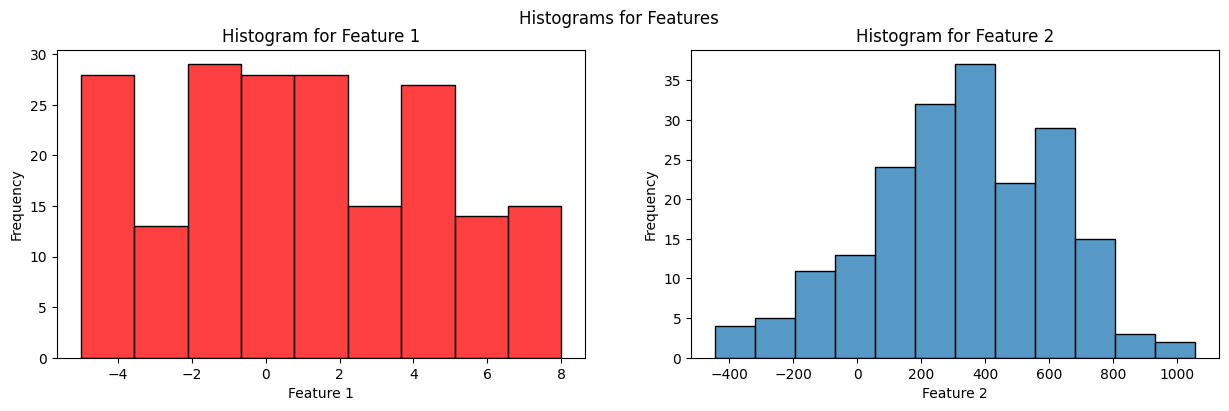

In [19]:
plt.figure(figsize=(15,4))
plt.suptitle('Histograms for Features')

plt.subplot(1,2,1)
sns.histplot(data = df,x = df['Feature1'],color='r')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title(f'Histogram for Feature 1')

plt.subplot(1,2,2)
sns.histplot(data = df,x = df['Feature2'])
plt.xlabel('Feature 2')
plt.ylabel('Frequency')
plt.title(f'Histogram for Feature 2')

plt.show()

* Observations - Feature2 Data is distributed normally

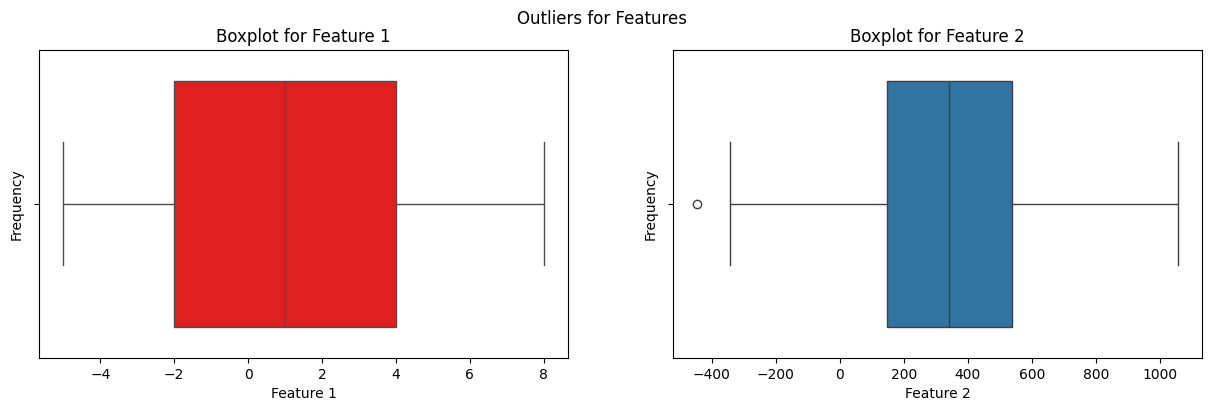

In [20]:
plt.figure(figsize=(15,4))
plt.suptitle('Outliers for Features')

plt.subplot(1,2,1)
sns.boxplot(data = df,x = df['Feature1'],color='r')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title(f'Boxplot for Feature 1')

plt.subplot(1,2,2)
sns.boxplot(data = df,x = df['Feature2'],orient='v')
plt.xlabel('Feature 2')
plt.ylabel('Frequency')
plt.title(f'Boxplot for Feature 2')

plt.show()

In [21]:
np.percentile(df['Feature1'],0.25),np.percentile(df['Feature1'],0.75),df['Feature1'].median()

(-5.0, -5.0, 1.0)

In [22]:
np.percentile(df['Feature2'],0.25),np.percentile(df['Feature2'],0.75),df['Feature2'].median()

(-395.51, -341.18, 342.0)

In [23]:
outlier = df[df['Feature2']<np.percentile(df['Feature2'],0.25)]
outlier

,Feature1,Feature2,Label
68,-1,-445,0


* Observations - Feature2 has outliers

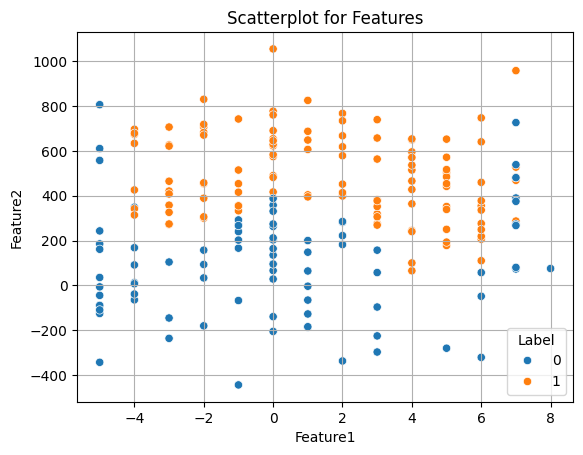

In [24]:
sns.scatterplot(data=df,x='Feature1',y='Feature2',hue='Label')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatterplot for Features')
plt.grid()
plt.show()

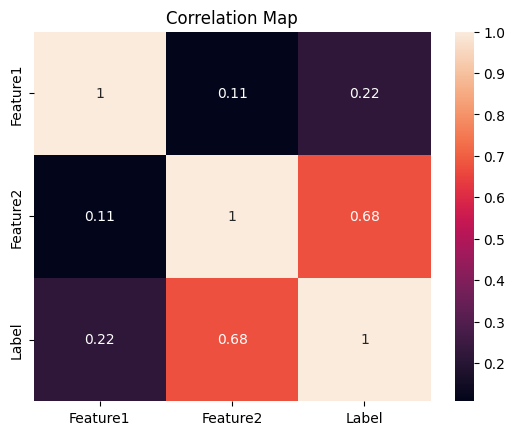

In [25]:
sns.heatmap(df.corr(),annot=True,cmap='rocket')
plt.title('Correlation Map')
plt.show()

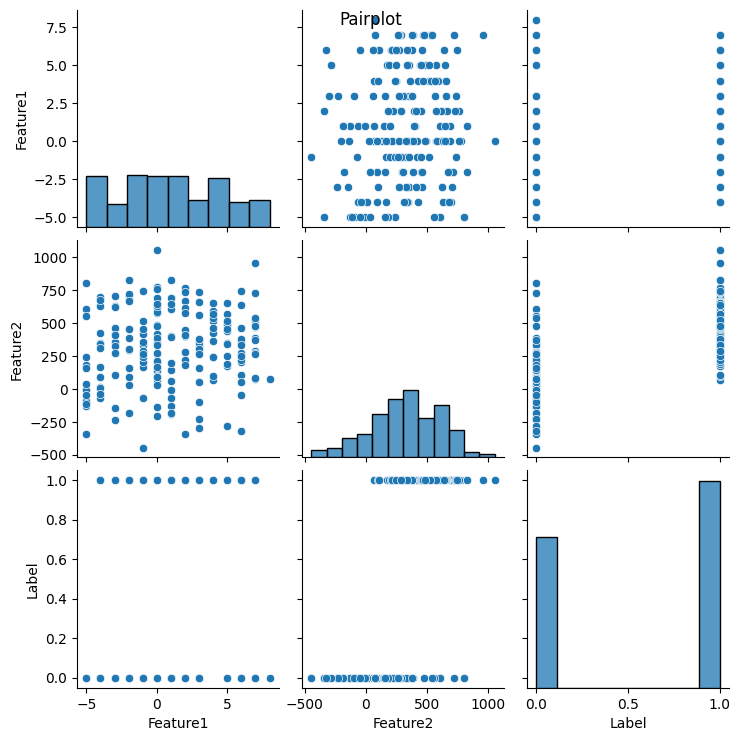

In [26]:
sns.pairplot(df)
plt.suptitle('Pairplot')
plt.show()

In [27]:
df.shape

(197, 3)

In [28]:
df.drop(outlier.index,inplace=True)

In [29]:
df.shape

(196, 3)

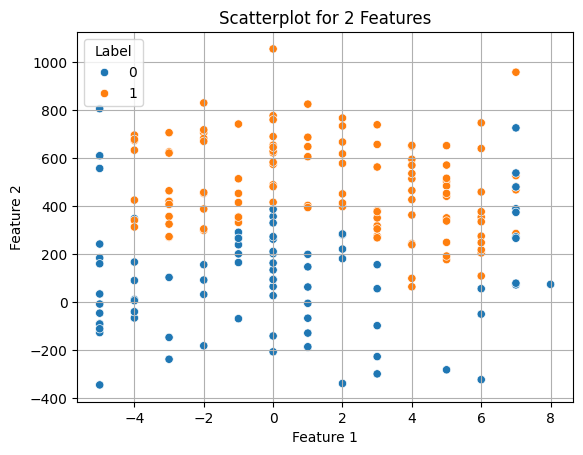

In [30]:
sns.scatterplot(data = df, x='Feature1',y='Feature2', hue="Label")
plt.grid()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatterplot for 2 Features')
plt.show()

In [32]:
df.head()

,Feature1,Feature2,Label
0,-5,807,0
1,-5,-344,0
2,-5,-126,0
3,-5,243,0
4,-5,185,0


In [33]:
df.isnull().sum()

Feature1    0
Feature2    0
Label       0
dtype: int64

In [34]:
df.shape

(196, 3)

In [ ]:
# Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


## A) Logistic Regression 

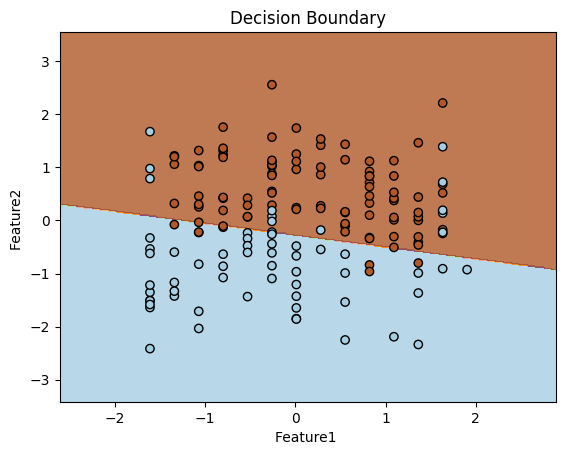

Model Accuracy : 85.00%


In [75]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(df[['Feature1', 'Feature2']], df['Label'], test_size=0.2, random_state=42)

# Standarization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing model
model_sklearn = LogisticRegression()

# Training
model_sklearn.fit(X_train_scaled, y_train)

# Decision boundary + plotting
def plot_decision_boundary_sklearn_scaled(X, y, model, title):
    h = .02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature1 ')
    plt.ylabel('Feature2 ')
    plt.show()

# For Trained Data
plot_decision_boundary_sklearn_scaled(X_train_scaled, y_train, model_sklearn, 'Decision Boundary')

# Evaluation
X_test_scaled = scaler.transform(X_test)  
y_pred_sklearn = model_sklearn.predict(X_test_scaled)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
# Metric
print(f"Model Accuracy : {accuracy_sklearn:.2%}")


## B) Implementation of  Logistic Regression from Scratch without scikit-learn

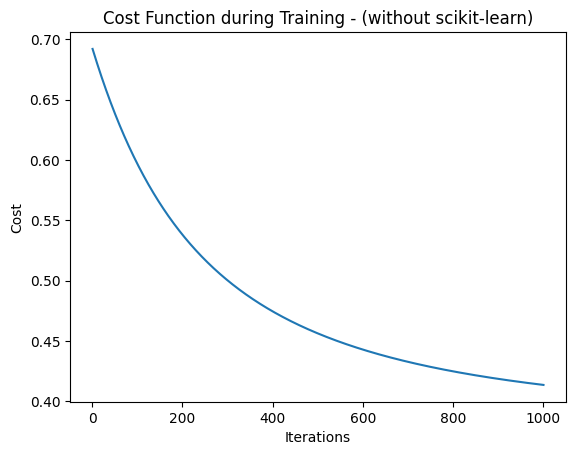

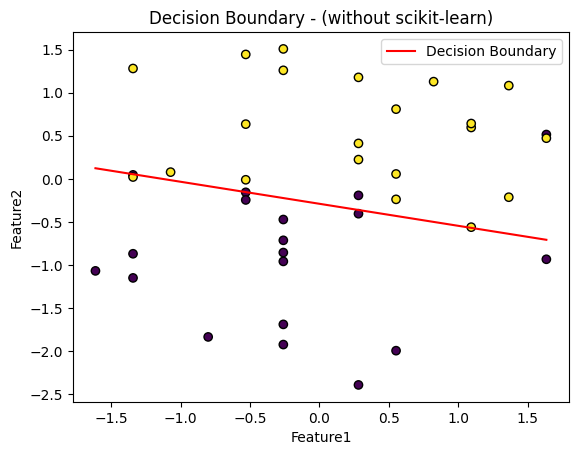

Model Accuracy: 92.50%


In [58]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Scaling
scaler = StandardScaler()
X_train_scaled[['Feature1', 'Feature2']] = scaler.fit_transform(X_train[['Feature1', 'Feature2']])
X_test_scaled[['Feature1', 'Feature2']] = scaler.transform(X_test[['Feature1', 'Feature2']])

# Bias
X_train_b = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_b = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

initial_theta = np.zeros(X_train_b.shape[1])

# Parameters
learning_rate = 0.01
num_iterations = 1000

# Training
trained_theta, costs = gradient_descent(X_train_b, y_train, initial_theta, learning_rate, num_iterations)

# Cost Function For Every Iterations
plt.plot(range(1, num_iterations + 1), costs)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function during Training - (without scikit-learn)')
plt.show()

# Decision Boundary 
x_values = np.linspace(X_test_scaled['Feature1'].min(), X_test_scaled['Feature1'].max(), 100)
plt.scatter(X_test_scaled['Feature1'], X_test_scaled['Feature2'], c=y_test, cmap='viridis', edgecolors='k', marker='o')
y_values = -(trained_theta[0] + trained_theta[1] * x_values) / trained_theta[2]
plt.plot(x_values, y_values, label='Decision Boundary', color='red')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary - (without scikit-learn)')
plt.legend()
plt.show()

# Prediction & Accuracy
predictions = sigmoid(X_test_b @ trained_theta)
predictions = (predictions >= 0.5).astype(int)
accuracy = np.mean(predictions == y_test)
print(f"Model Accuracy: {accuracy*100:.2f}%")


## C) Implementation of  Logistic Regression + Feature Engineering

In [61]:
df = pd.read_csv('updated_df.csv')

In [62]:
df.head()

,Unnamed: 0,Feature1,Feature2,Label
0,0,-5,807,0
1,1,-5,-344,0
2,2,-5,-126,0
3,3,-5,243,0
4,4,-5,185,0


In [63]:
df.drop(columns='Unnamed: 0',inplace=True)

In [64]:
df.shape

(196, 3)

In [65]:
df.isnull().sum()

Feature1    0
Feature2    0
Label       0
dtype: int64

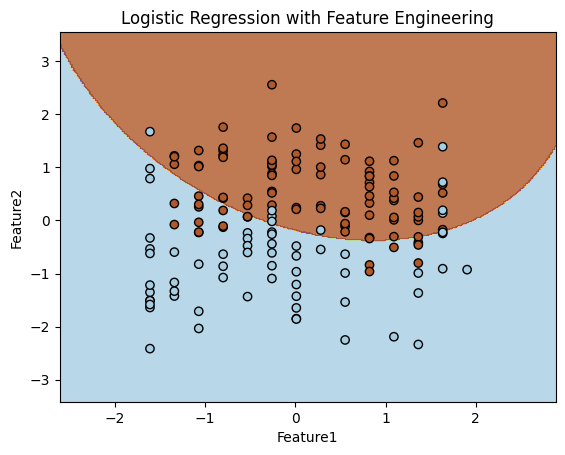

Model Accuracy with Feature Engineering: 82.50%


In [73]:
from sklearn.preprocessing import PolynomialFeatures # for Increasing Degree

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(df[['Feature1', 'Feature2']])
poly_feature_names = [f'poly_{i}' for i in range(X_poly.shape[1])]
df_poly = pd.DataFrame(X_poly, columns=poly_feature_names)
df_poly['Label'] = df['Label']

# Splitting
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    df_poly.iloc[:, :-1], df_poly['Label'], test_size=0.2, random_state=42)

# Standardization
scaler_poly = StandardScaler()
X_train_scaled_poly = scaler_poly.fit_transform(X_train_poly)
X_test_scaled_poly = scaler_poly.transform(X_test_poly)

# Initializing model
model_poly_sklearn = LogisticRegression()

# Training
model_poly_sklearn.fit(X_train_scaled_poly, y_train_poly)

# Decision boundary 
def plot_decision_boundary_sklearn_poly(X, y, model, title):
    h = .02  
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    meshgrid_poly = poly.transform(np.c_[xx.ravel(), yy.ravel()])

    Z = model.predict(meshgrid_poly)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 1], X[:, 2], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.title(title)
    plt.xlabel('Feature1')
    plt.ylabel('Feature2')
    plt.show()

plot_decision_boundary_sklearn_poly(X_train_scaled_poly, y_train_poly, model_poly_sklearn, 'Logistic Regression with Feature Engineering')

# Evaluation 
y_pred_poly_sklearn = model_poly_sklearn.predict(X_test_scaled_poly)
accuracy_poly_sklearn = accuracy_score(y_test_poly, y_pred_poly_sklearn)
print(f"Model Accuracy with Feature Engineering: {accuracy_poly_sklearn:.2%}")


In [72]:
X_train_poly.shape, X_test_poly.shape, y_train_poly.shape, y_test_poly.shape

((156, 6), (40, 6), (156,), (40,))

## D)Implementation of Logistic Regression from Scratch with Feature Engineering

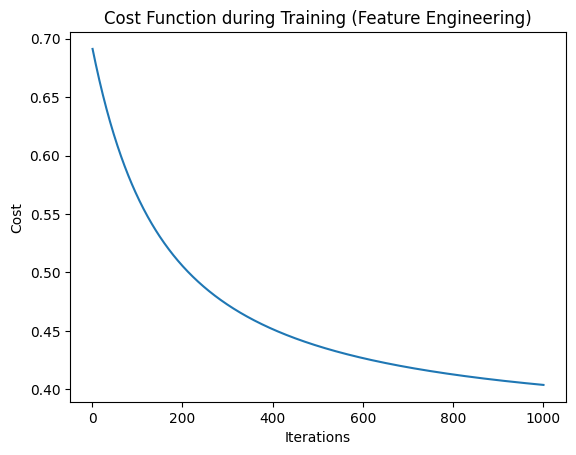

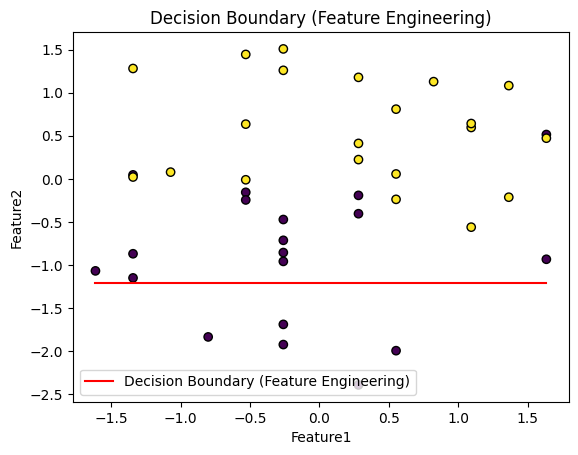

Model Accuracy : 87.50%


In [71]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def gradient_descent(X, y, theta, alpha, iterations):
    m = len(y)
    costs = []

    for i in range(iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * X.T @ (h - y)
        theta -= alpha * gradient
        cost = compute_cost(X, y, theta)
        costs.append(cost)

    return theta, costs

X_train_poly_scaled = X_train_poly.copy()
X_test_poly_scaled = X_test_poly.copy()

# Scaling
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

# Bias
X_train_poly_b = np.c_[np.ones((X_train_poly_scaled.shape[0], 1)), X_train_poly_scaled]
X_test_poly_b = np.c_[np.ones((X_test_poly_scaled.shape[0], 1)), X_test_poly_scaled]

initial_theta_poly = np.zeros(X_train_poly_b.shape[1])

# Parameters
learning_rate_poly = 0.01
num_iterations_poly = 1000

# Training
trained_theta_poly, costs_poly = gradient_descent(X_train_poly_b, y_train_poly, initial_theta_poly, learning_rate_poly, num_iterations_poly)

# Cost Function For Every Iterations
plt.plot(range(1, num_iterations_poly + 1), costs_poly)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function during Training (Feature Engineering)')
plt.show()

x_values_poly = np.linspace(X_test_poly_scaled[:, 1].min(), X_test_poly_scaled[:, 1].max(), 100)
plt.scatter(X_test_poly_scaled[:, 1], X_test_poly_scaled[:, 2], c=y_test_poly, cmap='viridis', edgecolors='k', marker='o')
y_values_poly = -(trained_theta_poly[0] + trained_theta_poly[1] * x_values_poly) / trained_theta_poly[2]
plt.plot(x_values_poly, y_values_poly, label='Decision Boundary (Feature Engineering)', color='red')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Decision Boundary (Feature Engineering)')
plt.legend()
plt.show()

# Evalution of Accuracy
predictions_poly = sigmoid(X_test_poly_b @ trained_theta_poly)
predictions_poly = (predictions_poly >= 0.5).astype(int)
accuracy_poly = accuracy_score(y_test_poly, predictions_poly)
print(f"Model Accuracy : {accuracy_poly*100:.2f}%")
